In [1]:
import numpy as np
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import math

# Specify the path to your .npy file
embed_file_path = 'Data_all/svm_x_gpt3_round_full.npy'

# Load the .npy file into a NumPy array
loaded_array = np.load(embed_file_path, allow_pickle=True).item()

# Now, 'loaded_array' contains the data from the .npy file
embed = loaded_array['x']
labels = loaded_array['labels']
modelname = loaded_array['model_sign']

print(embed.shape)
print(len(labels))
print(type(labels))
print(len(modelname))
print(type(modelname))

featuredim = embed.shape[1]
print(featuredim)

unique_elements = list(set(modelname))
print(unique_elements)

def find_indices(lst, element):
    indices = [index for index, value in enumerate(lst) if value == element]
    return indices


#########################################################################################################
############################### LEAVE one model out; train on the rest and test on the one
Dict_model_ind={}
ResultMat = []

for model in unique_elements:
    
    indicesA = [i for i, elem in enumerate(modelname) if (elem != model) and (elem != 'human')]
    indicesB = [i for i, elem in enumerate(modelname) if (elem == 'human')]
    # Determine the number of elements to choose (half of the list)
    num_elements_to_choose = len(indicesB) // 2
    # Randomly shuffle the list
    random.shuffle(indicesB)

    # Select the first half of the shuffled list
    selected_elements_train_human = indicesB[:num_elements_to_choose]
    selected_elements_test_human = indicesB[num_elements_to_choose:]
    
    indicesT = find_indices(modelname, model) 
    Dict_model_ind[model] = indicesT + selected_elements_test_human        #test set
    Dict_model_ind[model + '_opp'] = indicesA + selected_elements_train_human #train set
    #print(len(indices))
    #print(indices)

#print(Dict_model_ind)


for targetmodel in unique_elements:
    
    
    if targetmodel == 'human':
        continue
    else:
        
        result = {}
        ################# LEAVE one more out; train on the rest; and test on the remaining one model
        print('leaving: ' + targetmodel)  
        result['test'] = [targetmodel, 'human']
        print('testing set.....')
        ind_test = Dict_model_ind[targetmodel]
        #print(ind_test)
        X_test = embed[ind_test, :]
        #print(type(X_test))
        y_test = labels[ind_test]
        #print(modelname[ind_test])

        print('training set.....')
        #print(rest)
        ind_train = Dict_model_ind[targetmodel + '_opp']                
        X_train = embed[ind_train,:]
        #print(X_train.shape)
        y_train = labels[ind_train]
        #print(y_train)
        selectedMname = [modelname[i] for i in ind_train]
        allTrainModels = list(set(selectedMname))
        result['train'] = allTrainModels
         
        # Create an SVM classifier
        clf = SVC(kernel='rbf')
        
#         print(X_train.shape)
#         print(y_train.shape)
        #print(y_train)
#         nan_count = np.sum(np.isnan(y_train))

#         print("Number of NaN values in y_train:", nan_count)

        # Train the classifier on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = clf.predict(X_test)
        #print(y_pred)
        #print(y_test)

        # Calculate the accuracy of the classifier
        accuracies = (y_test == y_pred).astype(float)

        # Calculate average accuracy
        accuracy = np.mean(accuracies)

        # Calculate standard deviation of accuracy
        std_deviation = np.std(accuracies)/math.sqrt(len(accuracies))

        print("Average Accuracy:", accuracy)
        print("Standard Deviation of Accuracy:", std_deviation)

        result['accu'] = accuracy
        result['std'] = std_deviation
        result['flag'] = 'test'

        ResultMat.append(result)
        
        ############################### do the reverse; train on single; test on multiple   
        print('reversing the training and testing set')       
        result = {} 
        # Create an SVM classifier
        clf = SVC(kernel='rbf')
        
        # Train the classifier on the training data
        clf.fit(X_test, y_test)

        # Make predictions on the test data
        y_pred = clf.predict(X_train)
        
        # Calculate the accuracy of the classifier
        # Calculate the accuracy of the classifier
        accuracies = (y_train == y_pred).astype(float)
        #print(accuracies)
        # Calculate average accuracy
        accuracy = np.mean(accuracies)

        # Calculate standard deviation of accuracy
        std_deviation = np.std(accuracies)/math.sqrt(len(accuracies))

        print("Average Accuracy:", accuracy)
        print("Standard Deviation of Accuracy:", std_deviation)
                
        result['train'] = [targetmodel, 'human']
        result['test'] = allTrainModels
        result['accu'] = accuracy
        result['std'] = std_deviation
        result['flag'] = 'train'

        ResultMat.append(result)
        
print(ResultMat)

(1500, 12288)
1500
<class 'numpy.ndarray'>
1500
<class 'list'>
12288
['gpt3 (prompt curie)', 'gpt3 (prompt davinvci)', 'gpt2', ' gpt3 (embedding)', 'human', 'word2vec']
leaving: gpt3 (prompt curie)
testing set.....
training set.....
Average Accuracy: 0.9219047619047619
Standard Deviation of Accuracy: 0.011710505814953892
reversing the training and testing set
Average Accuracy: 0.9261538461538461
Standard Deviation of Accuracy: 0.008375354529551328
leaving: gpt3 (prompt davinvci)
testing set.....
training set.....
Average Accuracy: 0.9828571428571429
Standard Deviation of Accuracy: 0.0056650943911501946
reversing the training and testing set
Average Accuracy: 0.8933333333333333
Standard Deviation of Accuracy: 0.009885959423960517
leaving: gpt2
testing set.....
training set.....
Average Accuracy: 1.0
Standard Deviation of Accuracy: 0.0
reversing the training and testing set
Average Accuracy: 0.8933333333333333
Standard Deviation of Accuracy: 0.009885959423960517
leaving:  gpt3 (embedding

[0.9517948717948718, 0.8933333333333333, 0.7938461538461539, 0.9261538461538461, 0.8933333333333333]
5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


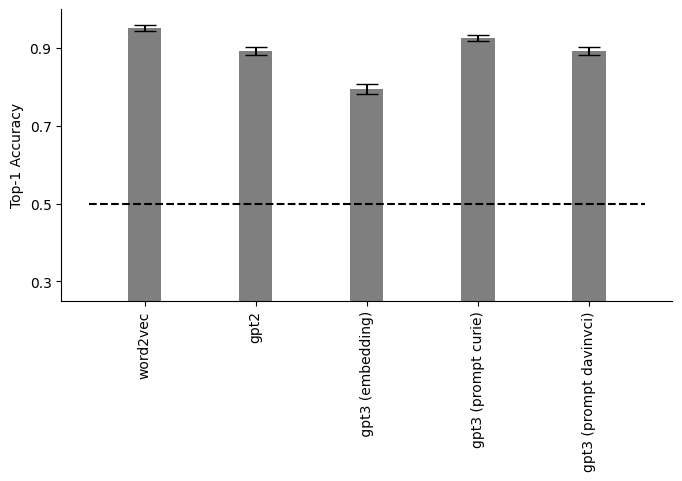

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.9352380952380952, 1.0, 0.9904761904761905, 0.9219047619047619, 0.9828571428571429]
5


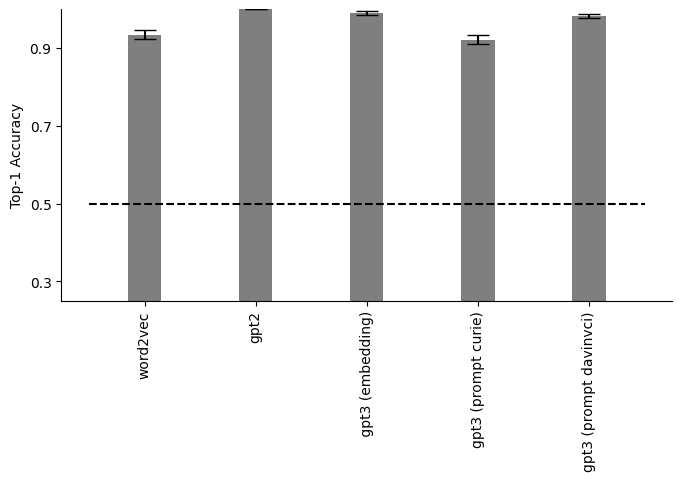

In [2]:
### plots for grouping demographic information
def plot_res_demographics(plotname, ResultMat):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patches import Rectangle
    
    modelist = ['word2vec', 'gpt2', ' gpt3 (embedding)', 'gpt3 (prompt curie)', 'gpt3 (prompt davinvci)']
        
    for condition in ['train','test']:
        top1 = []
        top1_std = []
        for selectedM in modelist:
            for result in ResultMat:
                if result['flag'] == condition:
                    if selectedM in result[condition]:
#                         print(result['flag'])
#                         print(condition)
#                         print(result[condition])
                        #chancenum = 1/(len(result['test']))
                        top1.append(result['accu'])
                        top1_std.append(result['std'])
                
        print(top1)        
        ######### everything is ready for plotting                
        years = list(range(1, len(modelist)))
        strtask = modelist
        # Figure Size
        fig, ax = plt.subplots(layout='constrained')
        #x = np.arange(len(strtask))  # the label locations

        width = 0.2  # the width of the bars
        print(len(strtask))
        ax.bar(strtask, top1, yerr=top1_std, color ='black', width = 0.3,align='center',
       alpha=0.5,
       ecolor='black',
       capsize=8)     

        #ax.set_xticks(x, strtask)
        #ax.legend(loc='upper left', ncols=len(condition_chosen_list))

        plt.ylabel('Top-1 Accuracy')
        plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

        plt.ylim(0.25, 1)
        y_ticks = [0.3,0.5,0.7,0.9]
        ax.set_yticks(y_ticks)
        #plt.xlim(0.5, len(years)+0.5)

        #draw chance 0.5 
        chancex =np.arange(len(years)+2)-0.5
        plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--')#, label='chance (50%)')
        #plt.legend()

        fig.tight_layout()

        fig.set_figwidth(7)
        fig.set_figheight(5)

        #fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.savefig(plotname + '_' + condition + '.eps', format='eps', bbox_inches='tight')
        plt.savefig(plotname + '_' + condition + '.png',  bbox_inches='tight')
        plt.show()
#     fig.savefig('../' + plotname + '.png', bbox_inches='tight')
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.pdf', bbox_inches='tight')
    
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.png', bbox_inches='tight')

#======================AGE=======
#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
key = 'AIjudge'
plotpathname = './plots/Task2_' + key + '_TrainTestSplits_BarPlotOverall' #for saving the plots
facebarcolor = ['dimgray','darkgrey','lightgrey']

plot_res_demographics(plotpathname, ResultMat)